# Player Wise Analysis

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
df=pd.read_csv('CWC23_all_innings.csv')

In [12]:
df

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05000,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.50,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05000,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.50,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05000,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.80,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05000,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05000,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,IND,Mohammed Shami (IND),bowl,42,47,1.0,0.02381,1.119048,v Australia,Ahmedabad,19-Nov-23,7.0,1.0,6.71,2,NaN,NaN,NaN,NaN,NaN
1433,AUS,TM Head (AUS),bowl,12,4,0.0,0.00000,0.333333,v India,Ahmedabad,19-Nov-23,2.0,0.0,2.00,1,NaN,NaN,NaN,NaN,NaN
1434,AUS,MR Marsh (AUS),bowl,12,5,0.0,0.00000,0.416667,v India,Ahmedabad,19-Nov-23,2.0,0.0,2.50,1,NaN,NaN,NaN,NaN,NaN
1435,IND,RA Jadeja (IND),bowl,60,43,0.0,0.00000,0.716667,v Australia,Ahmedabad,19-Nov-23,10.0,0.0,4.30,2,NaN,NaN,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1437 non-null   object 
 1   player           1437 non-null   object 
 2   bat_or_bowl      1437 non-null   object 
 3   bb_bf            1437 non-null   int64  
 4   runs             1437 non-null   int64  
 5   wkts             574 non-null    float64
 6   wicketball_prob  1437 non-null   float64
 7   runs_per_ball    1437 non-null   float64
 8   opposition       1437 non-null   object 
 9   ground           1437 non-null   object 
 10  start_date       1437 non-null   object 
 11  overs            574 non-null    float64
 12  mdns             574 non-null    float64
 13  econ             574 non-null    float64
 14  inns             1437 non-null   int64  
 15  4s               863 non-null    float64
 16  6s               863 non-null    float64
 17  sr            

In [14]:
for cols in df.select_dtypes(include=['object']).columns:
    print(f"Unique categories in {cols} column")
    print(df[cols].unique())
    print("="*100)

Unique categories in team column
['PAK' 'ENG' 'NZ' 'AFG' 'NED' 'BAN' 'SA' 'SL' 'AUS' 'IND']
Unique categories in player column
['Shaheen Shah Afridi (PAK)' 'DJ Willey (ENG)' 'MJ Henry (NZ)'
 'LH Ferguson (NZ)' 'Noor Ahmad (AFG)' 'Mujeeb Ur Rahman (AFG)'
 'AU Rashid (ENG)' 'LV van Beek (NED)' 'Mehidy Hasan Miraz (BAN)'
 'Mohammad Wasim (1) (PAK)' 'G Coetzee (SA)' 'D Madushanka (SL)'
 'A Zampa (AUS)' 'BFW de Leede (NED)' 'Shoriful Islam (BAN)'
 'TA Boult (NZ)' 'Tanzim Hasan Sakib (BAN)' 'Haris Rauf (PAK)'
 'RJW Topley (ENG)' 'Kuldeep Yadav (IND)' 'AD Mathews (SL)'
 'Mohammad Nabi (AFG)' 'GD Phillips (NZ)' 'Mohammed Shami (IND)'
 'JJ Bumrah (IND)' 'MR Marsh (AUS)' 'R Ravindra (NZ)' 'MJ Santner (NZ)'
 'KA Maharaj (SA)' 'L Ngidi (SA)' 'M Jansen (SA)' 'PJ Cummins (AUS)'
 'Hasan Ali (PAK)' 'CR Woakes (ENG)' 'GJ Maxwell (AUS)' 'HH Pandya (IND)'
 'RE van der Merwe (NED)' 'RA Jadeja (IND)' 'PA van Meekeren (NED)'
 'Fazalhaq Farooqi (AFG)' 'CAK Rajitha (SL)' 'T Shamsi (SA)'
 'Mahedi Hasan (BAN)' 

In [15]:
df['start_date']=pd.to_datetime(df['start_date'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16584\695902070.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_date']=pd.to_datetime(df['start_date'])


In [16]:
df.head()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,2023-10-27,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,2023-10-29,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,2023-10-05,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,2023-10-13,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,2023-10-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


In [17]:
(df.isnull().sum()/1408)*100

team                0.000000
player              0.000000
bat_or_bowl         0.000000
bb_bf               0.000000
runs                0.000000
wkts               61.292614
wicketball_prob     0.000000
runs_per_ball       0.000000
opposition          0.000000
ground              0.000000
start_date          0.000000
overs              61.292614
mdns               61.292614
econ               61.292614
inns                0.000000
4s                 40.767045
6s                 40.767045
sr                 40.767045
not_out            41.761364
mins               40.767045
dtype: float64

In [18]:
df['opposition']=df['opposition'].replace('v','',regex=True)
df

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05000,0.750000,South Africa,Chennai,2023-10-27,10.0,0.0,4.50,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05000,0.750000,India,Lucknow,2023-10-29,10.0,2.0,4.50,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05000,0.800000,England,Ahmedabad,2023-10-05,10.0,1.0,4.80,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05000,0.816667,Bangladesh,Chennai,2023-10-13,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05000,0.816667,Pakistan,Chennai,2023-10-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,IND,Mohammed Shami (IND),bowl,42,47,1.0,0.02381,1.119048,Australia,Ahmedabad,2023-11-19,7.0,1.0,6.71,2,NaN,NaN,NaN,NaN,NaN
1433,AUS,TM Head (AUS),bowl,12,4,0.0,0.00000,0.333333,India,Ahmedabad,2023-11-19,2.0,0.0,2.00,1,NaN,NaN,NaN,NaN,NaN
1434,AUS,MR Marsh (AUS),bowl,12,5,0.0,0.00000,0.416667,India,Ahmedabad,2023-11-19,2.0,0.0,2.50,1,NaN,NaN,NaN,NaN,NaN
1435,IND,RA Jadeja (IND),bowl,60,43,0.0,0.00000,0.716667,Australia,Ahmedabad,2023-11-19,10.0,0.0,4.30,2,NaN,NaN,NaN,NaN,NaN


In [19]:
df[df['bat_or_bowl']=='bat']

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
501,AUS,GJ Maxwell (AUS),bat,128,201,NaN,0.000000,1.5703,Afghanistan,Wankhede,2023-11-07,NaN,NaN,NaN,2,21.0,10.0,157.03,1.0,181.0
502,SA,Q de Kock (SA),bat,140,174,NaN,0.007143,1.2428,Bangladesh,Wankhede,2023-10-24,NaN,NaN,NaN,1,15.0,7.0,124.28,0.0,192.0
503,AUS,DA Warner (AUS),bat,124,163,NaN,0.008065,1.3145,Pakistan,Bengaluru,2023-10-20,NaN,NaN,NaN,1,14.0,9.0,131.45,0.0,180.0
504,NZ,DP Conway (NZ),bat,121,152,NaN,0.000000,1.2561,England,Ahmedabad,2023-10-05,NaN,NaN,NaN,2,19.0,3.0,125.61,1.0,147.0
505,ENG,DJ Malan (ENG),bat,107,140,NaN,0.009346,1.3084,Bangladesh,Dharamsala,2023-10-10,NaN,NaN,NaN,1,16.0,5.0,130.84,0.0,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,IND,Shubman Gill (IND),bat,7,4,NaN,0.142857,0.5714,Australia,Ahmedabad,2023-11-19,NaN,NaN,NaN,1,0.0,0.0,57.14,NaN,21.0
1421,IND,SS Iyer (IND),bat,3,4,NaN,0.333333,1.3333,Australia,Ahmedabad,2023-11-19,NaN,NaN,NaN,1,1.0,0.0,133.33,NaN,3.0
1422,AUS,SPD Smith (AUS),bat,9,4,NaN,0.111111,0.4444,India,Ahmedabad,2023-11-19,NaN,NaN,NaN,2,1.0,0.0,44.44,NaN,11.0
1423,AUS,GJ Maxwell (AUS),bat,1,2,NaN,0.000000,2.0000,India,Ahmedabad,2023-11-19,NaN,NaN,NaN,2,0.0,0.0,200.00,1.0,1.0


In [20]:
print("Total Scores of batting Teams")
df[df['bat_or_bowl']=='bat'].groupby('team')['runs'].sum()

Total Scores of batting Teams


team
AFG    1990
AUS    2945
BAN    1944
ENG    2135
IND    3038
NED    1728
NZ     2712
PAK    2220
SA     2773
SL     1942
Name: runs, dtype: int64

In [21]:
df[df['bat_or_bowl']=='bat'].groupby(['team','player'])['runs'].sum()

team  player                    
AFG   Azmatullah Omarzai (AFG)      353
      Fazalhaq Farooqi (AFG)          2
      Hashmatullah Shahidi (AFG)    310
      Ibrahim Zadran (AFG)          376
      Ikram Alikhil (AFG)            89
                                   ... 
SL    MD Shanaka (SL)                80
      MDKJ Perera (SL)              149
      P Nissanka (SL)               332
      PVD Chameera (SL)               6
      S Samarawickrama (SL)         373
Name: runs, Length: 146, dtype: int64

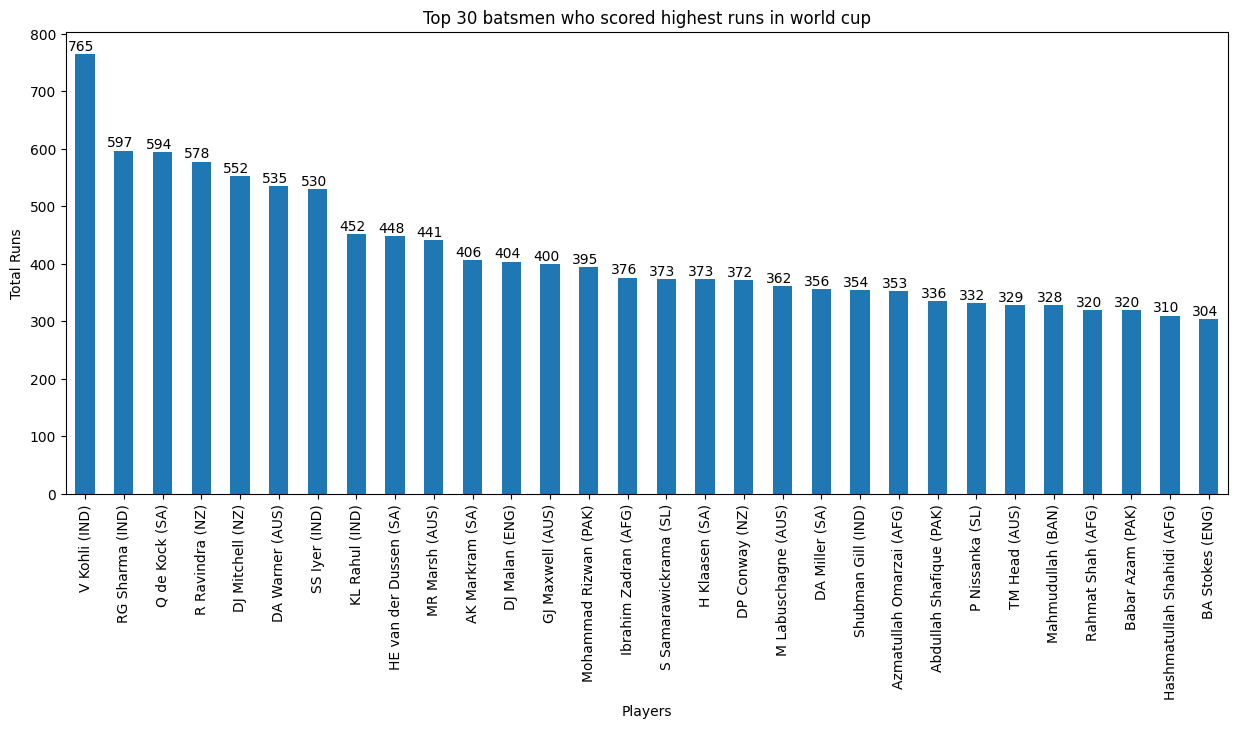

In [22]:
top_players = df[df['bat_or_bowl'] == 'bat'].groupby(['player'])['runs'].sum().sort_values(ascending=False).head(30)

# Plotting the bar chart
plt.figure(figsize=(15, 6))
bars = top_players.plot(kind='bar')

# Annotating each bar with the exact run value
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1, str(int(bar.get_height())), ha='center', va='bottom')

plt.xlabel("Players")
plt.ylabel("Total Runs")
plt.title("Top 30 batsmen who scored highest runs in world cup")
plt.show()

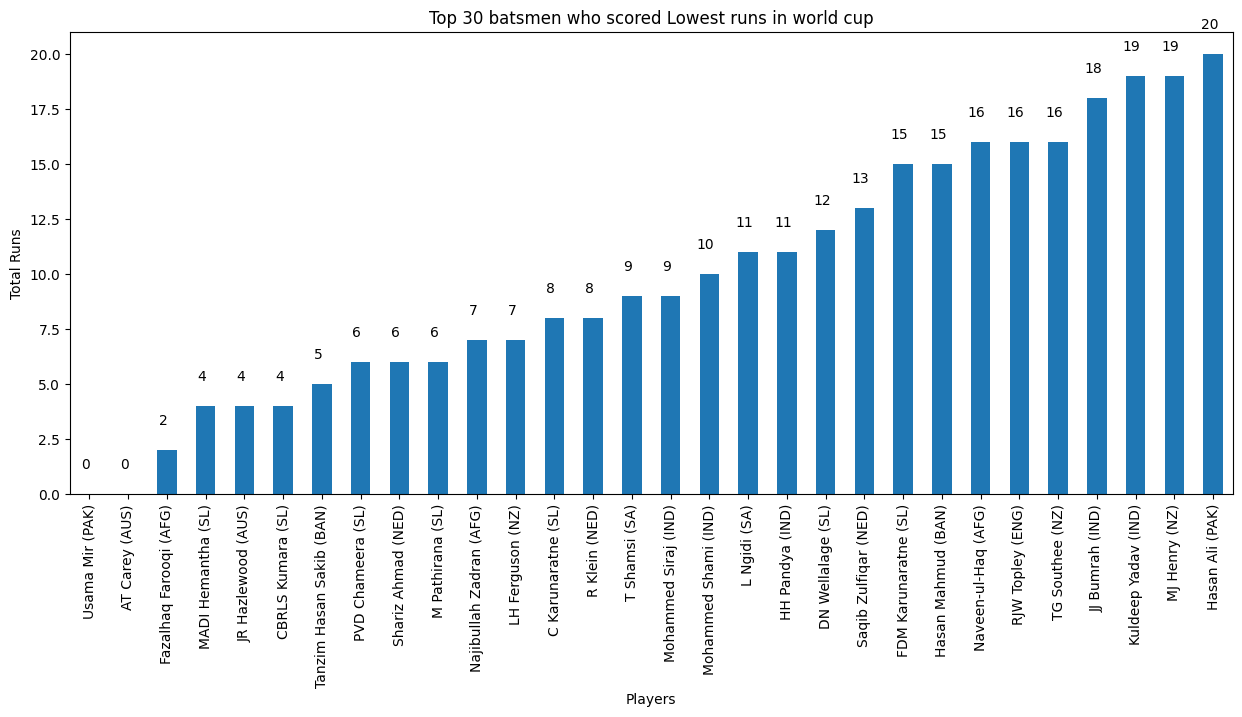

In [23]:
bottom_players = df[df['bat_or_bowl'] == 'bat'].groupby(['player'])['runs'].sum().sort_values(ascending=True).head(30)

# Plotting the bar chart
plt.figure(figsize=(15, 6))
bottom_bars = bottom_players.plot(kind='bar')

# Annotating each bar with the exact run value
for bar in bottom_bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1, str(int(bar.get_height())), ha='center', va='bottom')

plt.xlabel("Players")
plt.ylabel("Total Runs")
plt.title("Top 30 batsmen who scored Lowest runs in world cup")
plt.show()

In [24]:
df[df['bat_or_bowl']=='bat'].groupby('player')['6s'].sum().sort_values(ascending=False)

player
RG Sharma (IND)         31.0
SS Iyer (IND)           24.0
DA Warner (AUS)         24.0
DJ Mitchell (NZ)        22.0
GJ Maxwell (AUS)        22.0
                        ... 
JR Hazlewood (AUS)       0.0
SM Curran (ENG)          0.0
JJ Bumrah (IND)          0.0
Mohammed Siraj (IND)     0.0
L Ngidi (SA)             0.0
Name: 6s, Length: 146, dtype: float64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16584\3634332596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index,y=top_30.values,palette=custom_colors)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16584\3634332596.py:5: UserWarning: 
The palette list has fewer values (10) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_30.index,y=top_30.values,palette=custom_colors)


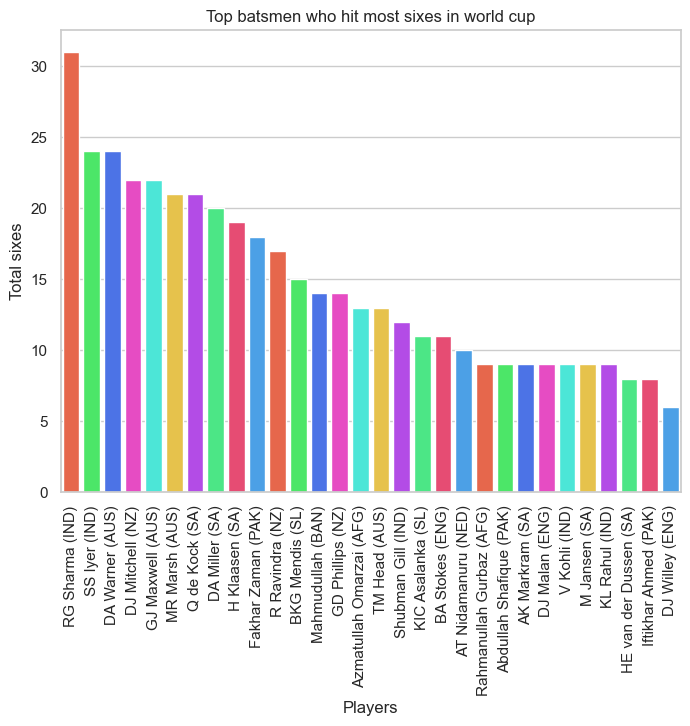

In [25]:
plt.figure(figsize=(8,6))
top_30=df[df['bat_or_bowl']=='bat'].groupby('player')['6s'].sum().sort_values(ascending=False).head(30)
sns.set(style='whitegrid')
custom_colors = ["#FF5733", "#33FF57", "#3366FF", "#FF33D1", "#33FFEC", "#FFD033", "#BB33FF", "#33FF80", "#FF3366", "#33A2FF"]
sns.barplot(x=top_30.index,y=top_30.values,palette=custom_colors)
plt.xlabel("Players")
plt.ylabel("Total sixes")
plt.title("Top batsmen who hit most sixes in world cup")
plt.xticks(rotation=90)
plt.show()

In [26]:
df[df['bat_or_bowl']=='bat'].groupby('player')['4s'].sum().sort_values(ascending=False)

player
V Kohli (IND)             68.0
RG Sharma (IND)           66.0
Q de Kock (SA)            57.0
R Ravindra (NZ)           55.0
DP Conway (NZ)            54.0
                          ... 
K Rabada (SA)              0.0
R Klein (NED)              0.0
PVD Chameera (SL)          0.0
L Ngidi (SA)               0.0
Fazalhaq Farooqi (AFG)     0.0
Name: 4s, Length: 146, dtype: float64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16584\746624669.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index,y=top_30.values,palette=custom_colors)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16584\746624669.py:5: UserWarning: 
The palette list has fewer values (4) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_30.index,y=top_30.values,palette=custom_colors)


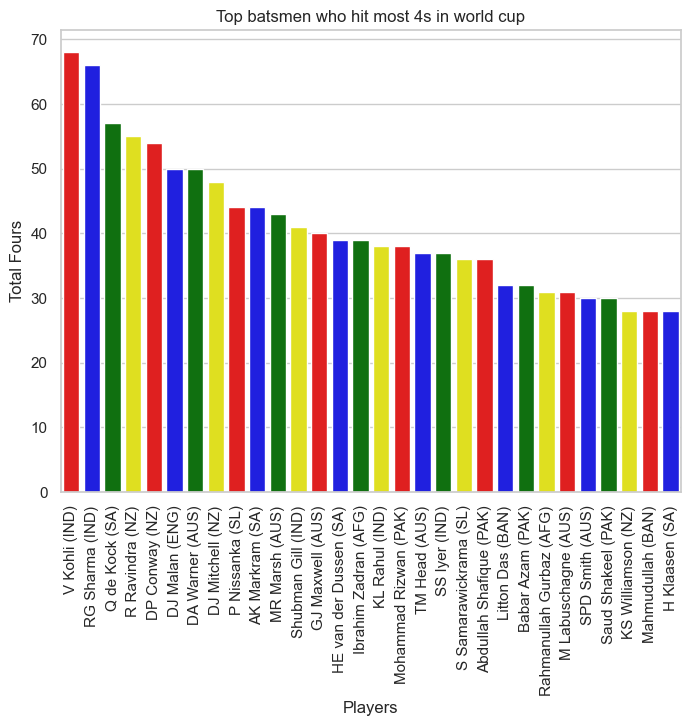

In [27]:
plt.figure(figsize=(8,6))
top_30=df[df['bat_or_bowl']=='bat'].groupby('player')['4s'].sum().sort_values(ascending=False).head(30)
sns.set(style='whitegrid')
custom_colors = ['red','blue','green','yellow']
sns.barplot(x=top_30.index,y=top_30.values,palette=custom_colors)
plt.xlabel("Players")
plt.ylabel("Total Fours")
plt.title("Top batsmen who hit most 4s in world cup")
plt.xticks(rotation=90)
plt.show()

In [28]:
df[df['bat_or_bowl']=='bat'].groupby('player')['runs_per_ball'].sum().sort_values(ascending=False)

player
AK Markram (SA)           15.152500
RG Sharma (IND)           14.068730
DA Warner (AUS)           13.153252
DA Miller (SA)            12.334600
H Klaasen (SA)            12.319500
                            ...    
R Klein (NED)              0.533300
Fazalhaq Farooqi (AFG)     0.500000
CBRLS Kumara (SL)          0.500000
AT Carey (AUS)             0.000000
Usama Mir (PAK)            0.000000
Name: runs_per_ball, Length: 146, dtype: float64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16584\2687205338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index,y=top_30.values,palette=custom_colors)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16584\2687205338.py:5: UserWarning: 
The palette list has fewer values (4) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_30.index,y=top_30.values,palette=custom_colors)


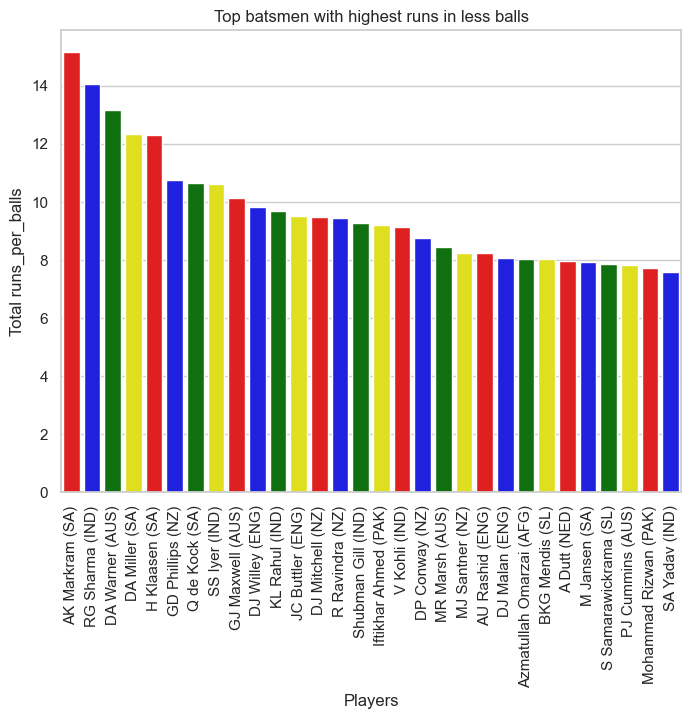

In [29]:
plt.figure(figsize=(8,6))
top_30=df[df['bat_or_bowl']=='bat'].groupby('player')['runs_per_ball'].sum().sort_values(ascending=False).head(30)
sns.set(style='whitegrid')
custom_colors = ['red','blue','green','yellow']
sns.barplot(x=top_30.index,y=top_30.values,palette=custom_colors)
plt.xlabel("Players")
plt.ylabel("Total runs_per_balls")
plt.title("Top batsmen with highest runs in less balls")
plt.xticks(rotation=90)
plt.show()

In [30]:
total_not_outs=df[df['bat_or_bowl']=='bat'].groupby('player')['not_out'].sum().sort_values(ascending=False)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16584\154581218.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index,y=top_30.values,palette=custom_colors)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16584\154581218.py:5: UserWarning: 
The palette list has fewer values (4) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_30.index,y=top_30.values,palette=custom_colors)


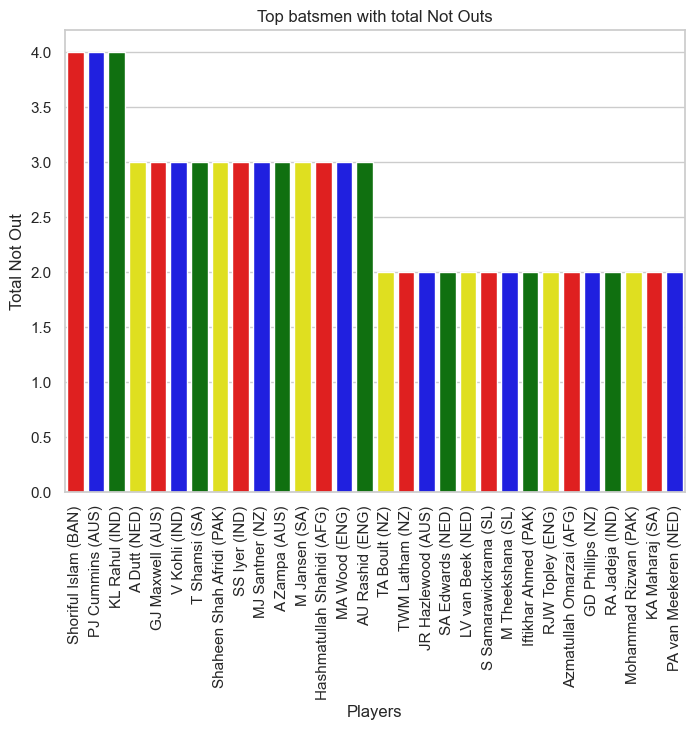

In [31]:
plt.figure(figsize=(8,6))
top_30=df[df['bat_or_bowl']=='bat'].groupby('player')['not_out'].sum().sort_values(ascending=False).head(30)
sns.set(style='whitegrid')
custom_colors = ['red','blue','green','yellow']
sns.barplot(x=top_30.index,y=top_30.values,palette=custom_colors)
plt.xlabel("Players")
plt.ylabel("Total Not Out")
plt.title("Top batsmen with total Not Outs")
plt.xticks(rotation=90)
plt.show()

In [32]:
print(pd.DataFrame(df[df['bat_or_bowl']=='bat'].groupby('player')['not_out'].sum().sort_values(ascending=True)).head(50))
print("Players who were out in every matches")

                          not_out
player                           
WA Young (NZ)                 0.0
JP Inglis (AUS)               0.0
JM Bairstow (ENG)             0.0
JE Root (ENG)                 0.0
JDS Neesham (NZ)              0.0
JC Buttler (ENG)              0.0
Ishan Kishan (IND)            0.0
R Klein (NED)                 0.0
Imam-ul-Haq (PAK)             0.0
RG Sharma (IND)               0.0
RR Hendricks (SA)             0.0
Rahmanullah Gurbaz (AFG)      0.0
Hasan Mahmud (BAN)            0.0
Hasan Ali (PAK)               0.0
Mehidy Hasan Miraz (BAN)      0.0
RE van der Merwe (NED)        0.0
HC Brook (ENG)                0.0
K Rabada (SA)                 0.0
KIC Asalanka (SL)             0.0
Mohammad Nabi (AFG)           0.0
MP O'Dowd (NED)               0.0
MM Ali (ENG)                  0.0
Mohammad Nawaz (3) (PAK)      0.0
MDKJ Perera (SL)              0.0
MD Shanaka (SL)               0.0
Q de Kock (SA)                0.0
W Barresi (NED)               0.0
Litton Das (BA

In [33]:
top_30=df[df['bat_or_bowl']=='bat'].groupby('player')['mins'].sum().sort_values(ascending=False).head(30)

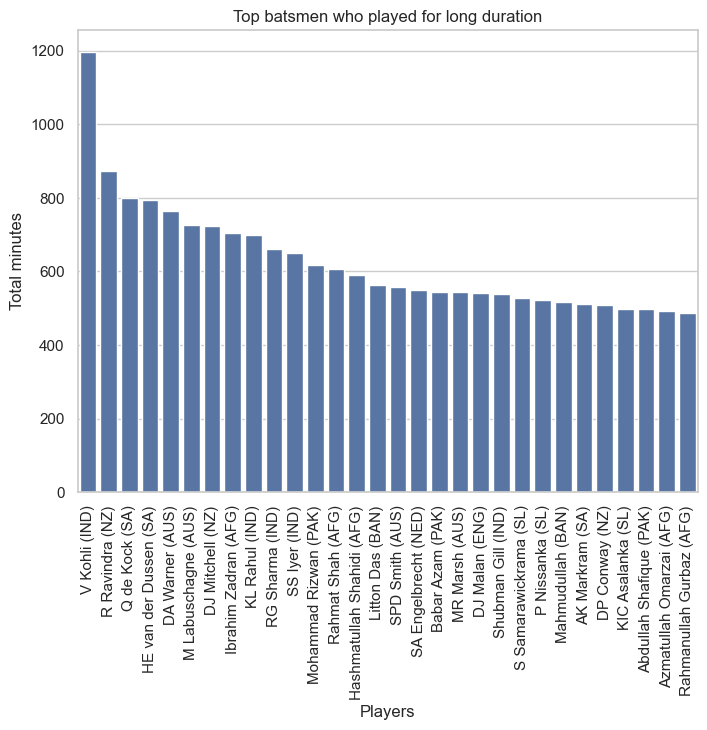

In [34]:
plt.figure(figsize=(8,6))
top_30=df[df['bat_or_bowl']=='bat'].groupby('player')['mins'].sum().sort_values(ascending=False).head(30)
sns.set(style='whitegrid')
sns.barplot(x=top_30.index,y=top_30.values)
plt.xlabel("Players")
plt.ylabel("Total minutes")
plt.title("Top batsmen who played for long duration")
plt.xticks(rotation=90)
plt.show()

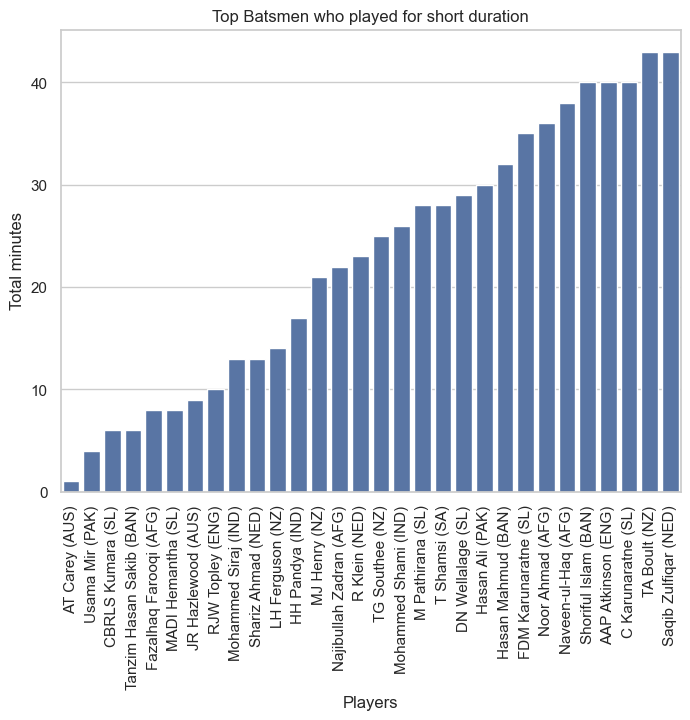

In [35]:
plt.figure(figsize=(8,6))
bottom_30=df[df['bat_or_bowl']=='bat'].groupby('player')['mins'].sum().sort_values(ascending=True).head(30)
sns.set(style='whitegrid')
sns.barplot(x=bottom_30.index,y=bottom_30.values)
plt.xlabel("Players")
plt.ylabel("Total minutes")
plt.title("Top Batsmen who played for short duration")
plt.xticks(rotation=90)
plt.show()

In [36]:
batsmen_data=df[df['bat_or_bowl']=='bat']

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16584\3124820457.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(batsmen_data['runs'],kde=False)


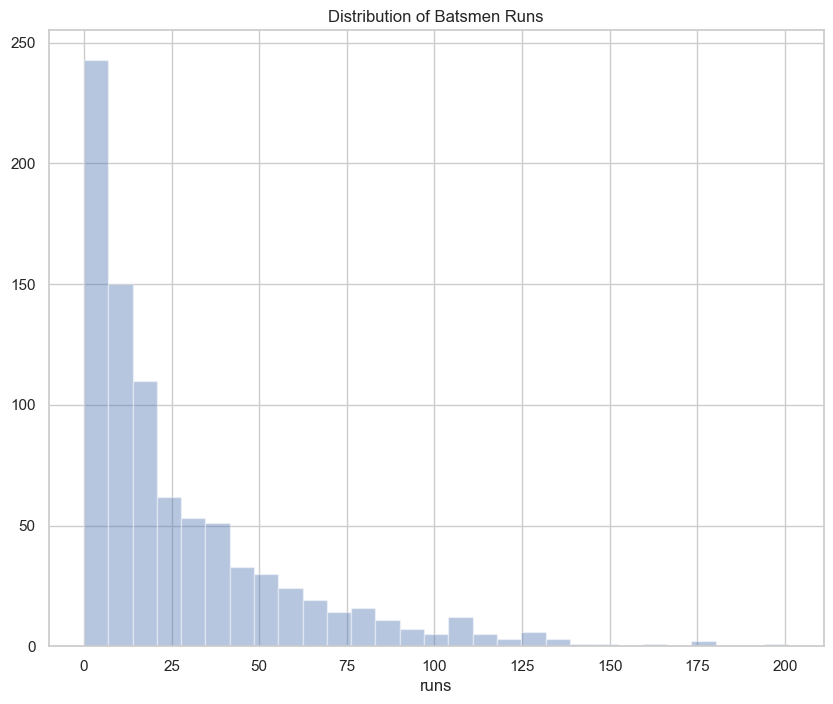

In [37]:
plt.figure(figsize=(10,8))
sns.distplot(batsmen_data['runs'],kde=False)
plt.title("Distribution of Batsmen Runs")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16584\2628897064.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(batsmen_data['sr'],kde=False)


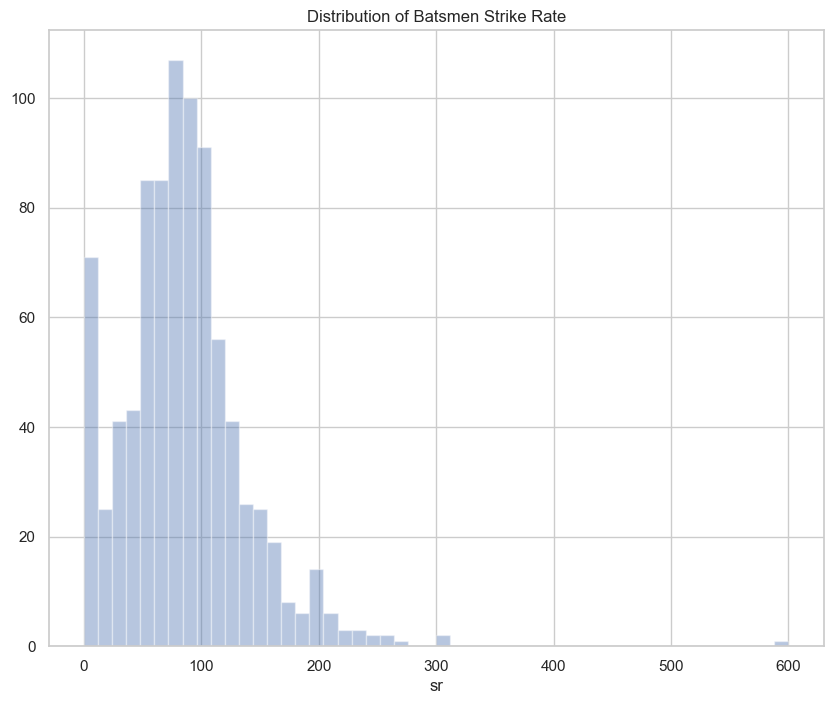

In [38]:
plt.figure(figsize=(10,8))
sns.distplot(batsmen_data['sr'],kde=False)
plt.title("Distribution of Batsmen Strike Rate")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16584\1844293904.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bowler_df['wkts'],kde=False)


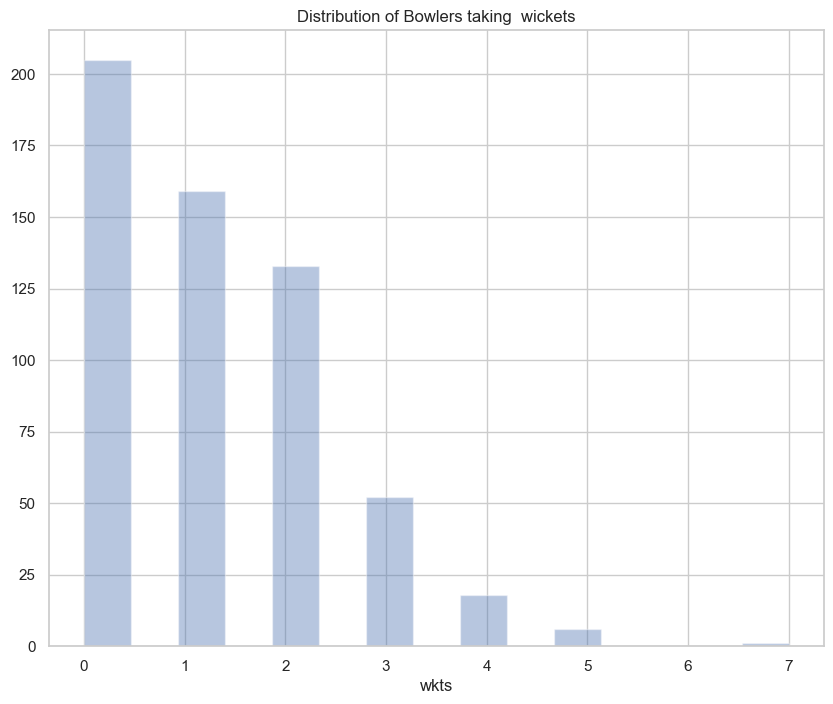

In [39]:
bowler_df=df[df['bat_or_bowl']=='bowl']
plt.figure(figsize=(10,8))
sns.distplot(bowler_df['wkts'],kde=False)
plt.title("Distribution of Bowlers taking  wickets")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16584\3202540981.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bowler_df['mdns'],kde=False)


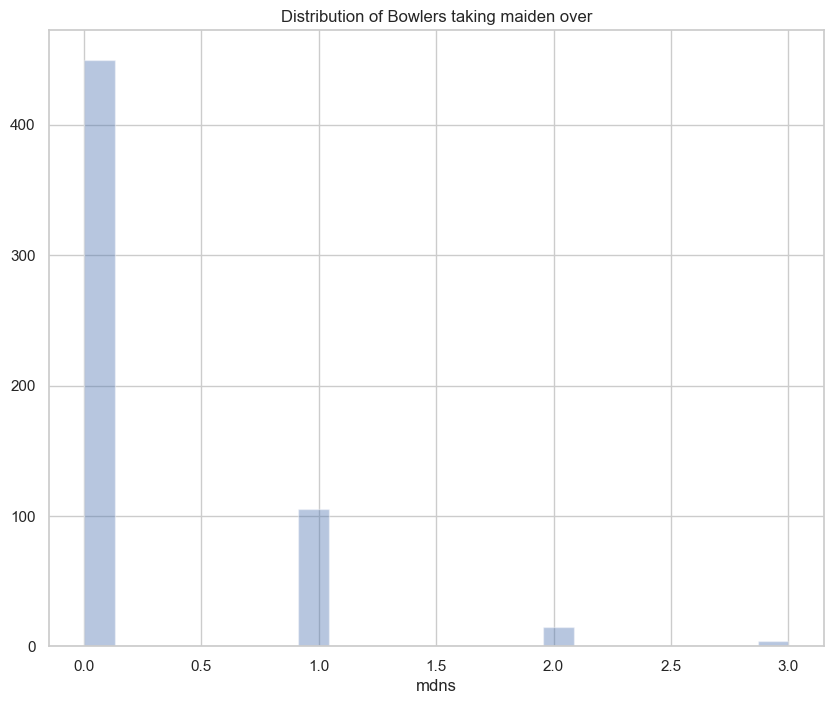

In [40]:
bowler_df=df[df['bat_or_bowl']=='bowl']
plt.figure(figsize=(10,8))
sns.distplot(bowler_df['mdns'],kde=False)
plt.title("Distribution of Bowlers taking maiden over")
plt.show()

In [41]:
# Iterate over unique combinations of 'opposition', 'team', 'year'
df_unique=df[['opposition','team','start_date']].drop_duplicates()
for opposition, team, year in df_unique.itertuples(index=False):
    
    # Filter the DataFrame based on conditions
    data = df[(df['team']==team)& (df['start_date']==year)&(df['opposition'] == opposition) & (df['bat_or_bowl'] == 'bowl')]
    
    # Calculate batting runs
    batting_runs = data.groupby('start_date')['runs'].sum()
    runs = batting_runs.values[0]  # Assuming a single value for runs
    
    # Calculate bowl played
    bowl_played = data.groupby('start_date')['bb_bf'].sum()
    bp = bowl_played.values[0]  # Assuming a single value for bowl played
    
    # Calculate count
    total_wkts=data.groupby('start_date')['wkts'].sum()
    wkts_sum=total_wkts.values[0]
    wkts_sum=np.abs(wkts_sum-10)
    # Print information for each match separately
    print(f"{opposition} made {runs} runs in {bp} balls by {wkts_sum} wickets on date {batting_runs.index[0].strftime('%Y-%m-%d')}")


 South Africa made 265 runs in 284 balls by 1.0 wickets on date 2023-10-27
 India made 225 runs in 300 balls by 2.0 wickets on date 2023-10-29
 England made 282 runs in 300 balls by 1.0 wickets on date 2023-10-05
 Bangladesh made 244 runs in 300 balls by 1.0 wickets on date 2023-10-13
 Pakistan made 278 runs in 300 balls by 3.0 wickets on date 2023-10-23
 England made 211 runs in 243 balls by 0.0 wickets on date 2023-10-15
 Netherlands made 175 runs in 224 balls by 1.0 wickets on date 2023-11-08
 South Africa made 205 runs in 257 balls by 0.0 wickets on date 2023-10-17
 Pakistan made 203 runs in 195 balls by 7.0 wickets on date 2023-10-31
 New Zealand made 393 runs in 300 balls by 4.0 wickets on date 2023-11-04
 Bangladesh made 231 runs in 280 balls by 0.0 wickets on date 2023-10-24
 Sri Lanka made 321 runs in 269 balls by 0.0 wickets on date 2023-10-07
 Bangladesh made 269 runs in 247 balls by 3.0 wickets on date 2023-11-06
 New Zealand made 379 runs in 300 balls by 2.0 wickets on dat

In [42]:
df

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05000,0.750000,South Africa,Chennai,2023-10-27,10.0,0.0,4.50,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05000,0.750000,India,Lucknow,2023-10-29,10.0,2.0,4.50,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05000,0.800000,England,Ahmedabad,2023-10-05,10.0,1.0,4.80,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05000,0.816667,Bangladesh,Chennai,2023-10-13,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05000,0.816667,Pakistan,Chennai,2023-10-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,IND,Mohammed Shami (IND),bowl,42,47,1.0,0.02381,1.119048,Australia,Ahmedabad,2023-11-19,7.0,1.0,6.71,2,NaN,NaN,NaN,NaN,NaN
1433,AUS,TM Head (AUS),bowl,12,4,0.0,0.00000,0.333333,India,Ahmedabad,2023-11-19,2.0,0.0,2.00,1,NaN,NaN,NaN,NaN,NaN
1434,AUS,MR Marsh (AUS),bowl,12,5,0.0,0.00000,0.416667,India,Ahmedabad,2023-11-19,2.0,0.0,2.50,1,NaN,NaN,NaN,NaN,NaN
1435,IND,RA Jadeja (IND),bowl,60,43,0.0,0.00000,0.716667,Australia,Ahmedabad,2023-11-19,10.0,0.0,4.30,2,NaN,NaN,NaN,NaN,NaN


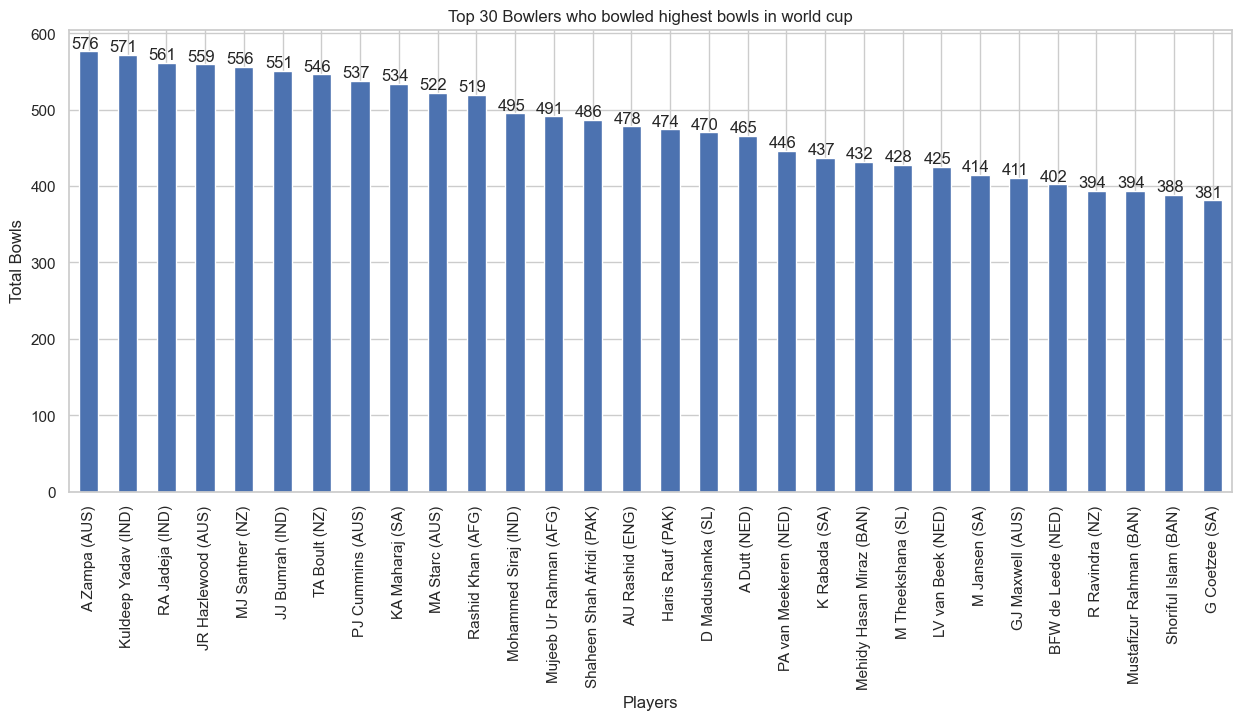

In [43]:
top_players = df[df['bat_or_bowl'] == 'bowl'].groupby(['player'])['bb_bf'].sum().sort_values(ascending=False).head(30)

# Plotting the bar chart
plt.figure(figsize=(15, 6))
bars = top_players.plot(kind='bar')

# Annotating each bar with the exact run value
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1, str(int(bar.get_height())), ha='center', va='bottom')

plt.xlabel("Players")
plt.ylabel("Total Bowls")
plt.title("Top 30 Bowlers who bowled highest bowls in world cup")
plt.show()

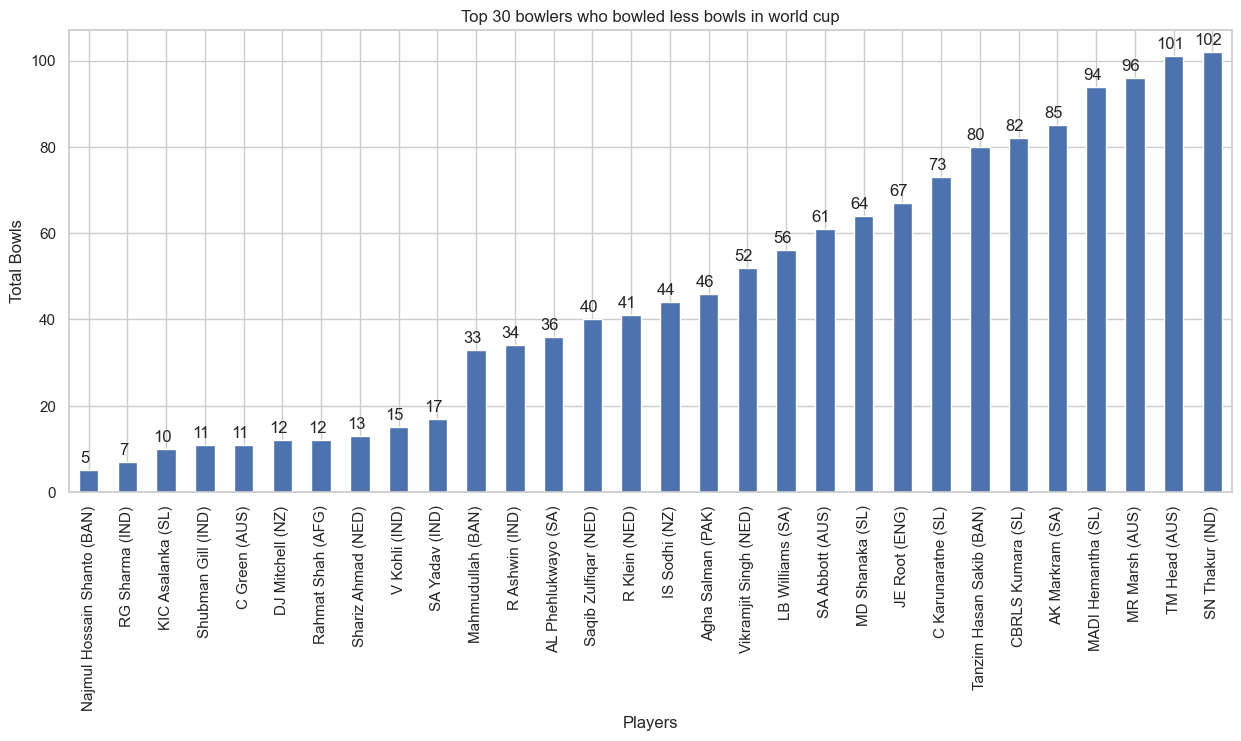

In [44]:
bottom_players = df[df['bat_or_bowl'] == 'bowl'].groupby(['player'])['runs'].sum().sort_values(ascending=True).head(30)

# Plotting the bar chart
plt.figure(figsize=(15, 6))
bottom_bars = bottom_players.plot(kind='bar')

# Annotating each bar with the exact run value
for bar in bottom_bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1, str(int(bar.get_height())), ha='center', va='bottom')

plt.xlabel("Players")
plt.ylabel("Total Bowls")
plt.title("Top 30 bowlers who bowled less bowls in world cup")
plt.show()

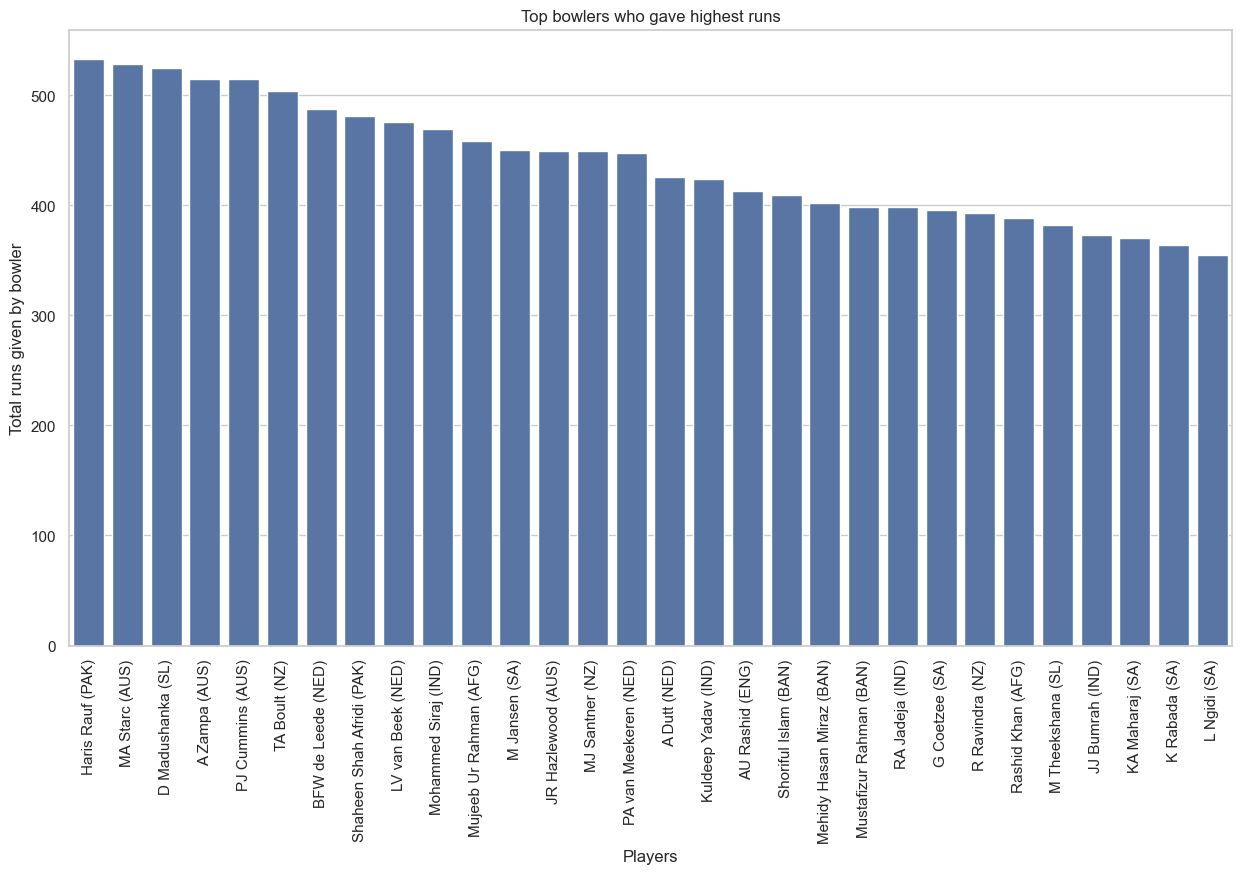

In [45]:
plt.figure(figsize=(15,8))
runs_hit_to_bowlers=df[df['bat_or_bowl']=='bowl'].groupby('player')['runs'].sum().sort_values(ascending=False).head(30)
sns.barplot(x=runs_hit_to_bowlers.index,y=runs_hit_to_bowlers.values)
plt.xlabel("Players")
plt.ylabel("Total runs given by bowler")
plt.title("Top bowlers who gave highest runs")
plt.xticks(rotation=90)
plt.show()

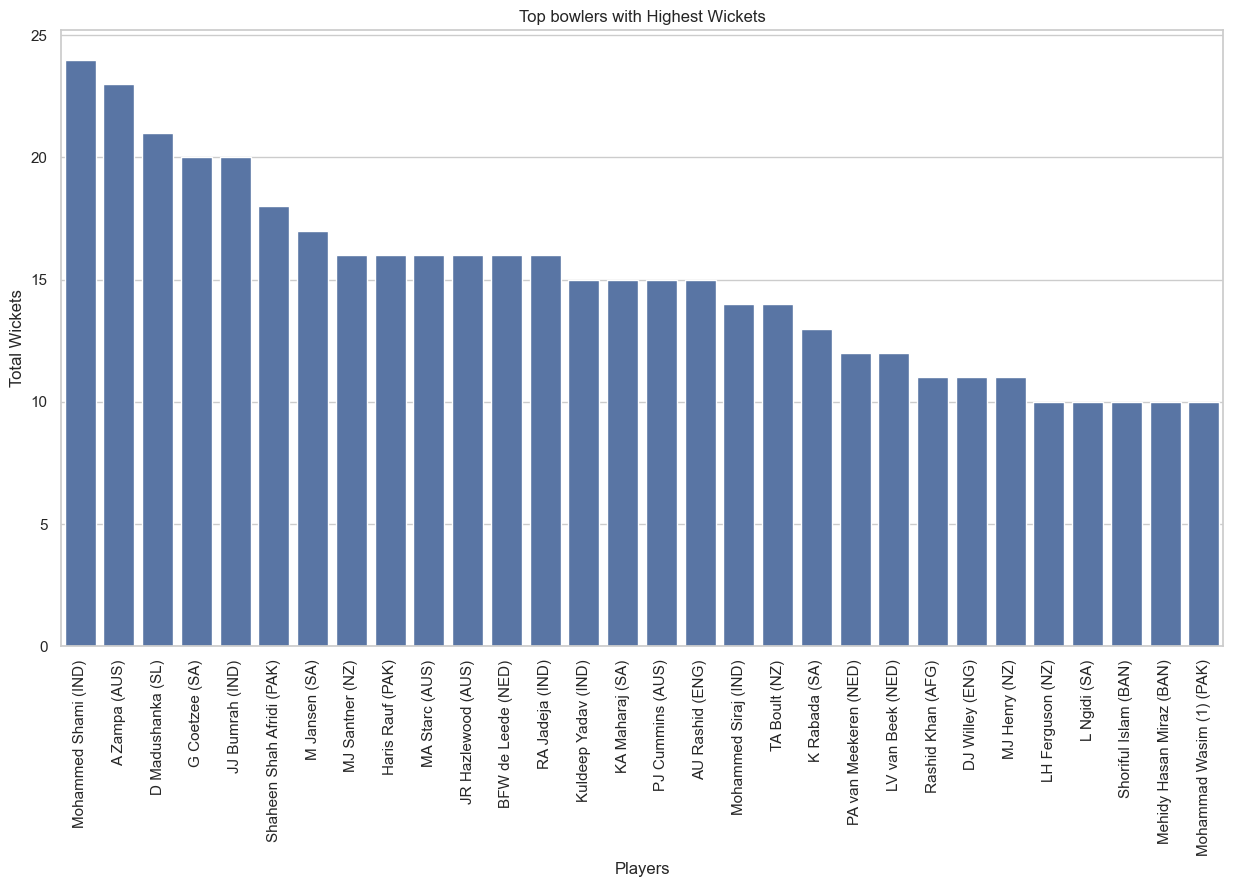

In [46]:
plt.figure(figsize=(15,8))
total_wkts=df[df['bat_or_bowl']=='bowl'].groupby('player')['wkts'].sum().sort_values(ascending=False).head(30)
sns.barplot(x=total_wkts.index,y=total_wkts.values)
plt.xlabel("Players")
plt.ylabel("Total Wickets")
plt.title("Top bowlers with Highest Wickets")
plt.xticks(rotation=90)
plt.show()

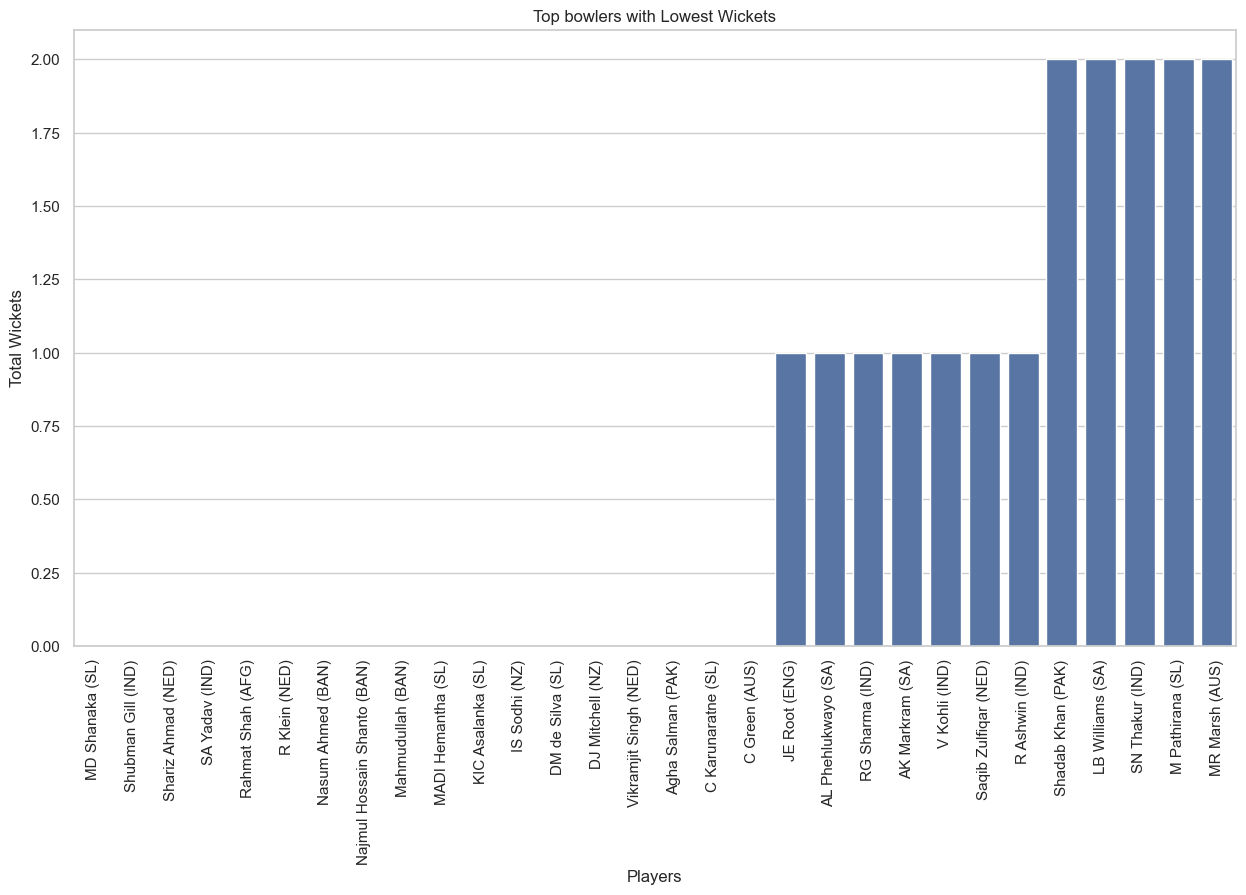

In [47]:
plt.figure(figsize=(15,8))
total_wkts=df[df['bat_or_bowl']=='bowl'].groupby('player')['wkts'].sum().sort_values(ascending=True).head(30)
sns.barplot(x=total_wkts.index,y=total_wkts.values)
plt.xlabel("Players")
plt.ylabel("Total Wickets")
plt.title("Top bowlers with Lowest Wickets")
plt.xticks(rotation=90)
plt.show()

In [48]:
df[df['bat_or_bowl']=='bowl'].groupby('player')['wkts'].sum().sort_values(ascending=True).head(50)

player
MD Shanaka (SL)                0.0
Shubman Gill (IND)             0.0
Shariz Ahmad (NED)             0.0
SA Yadav (IND)                 0.0
Rahmat Shah (AFG)              0.0
R Klein (NED)                  0.0
Nasum Ahmed (BAN)              0.0
Najmul Hossain Shanto (BAN)    0.0
Mahmudullah (BAN)              0.0
MADI Hemantha (SL)             0.0
KIC Asalanka (SL)              0.0
IS Sodhi (NZ)                  0.0
DM de Silva (SL)               0.0
DJ Mitchell (NZ)               0.0
Vikramjit Singh (NED)          0.0
Agha Salman (PAK)              0.0
C Karunaratne (SL)             0.0
C Green (AUS)                  0.0
JE Root (ENG)                  1.0
AL Phehlukwayo (SA)            1.0
RG Sharma (IND)                1.0
AK Markram (SA)                1.0
V Kohli (IND)                  1.0
Saqib Zulfiqar (NED)           1.0
R Ashwin (IND)                 1.0
Shadab Khan (PAK)              2.0
LB Williams (SA)               2.0
SN Thakur (IND)                2.0
M Pathirana (

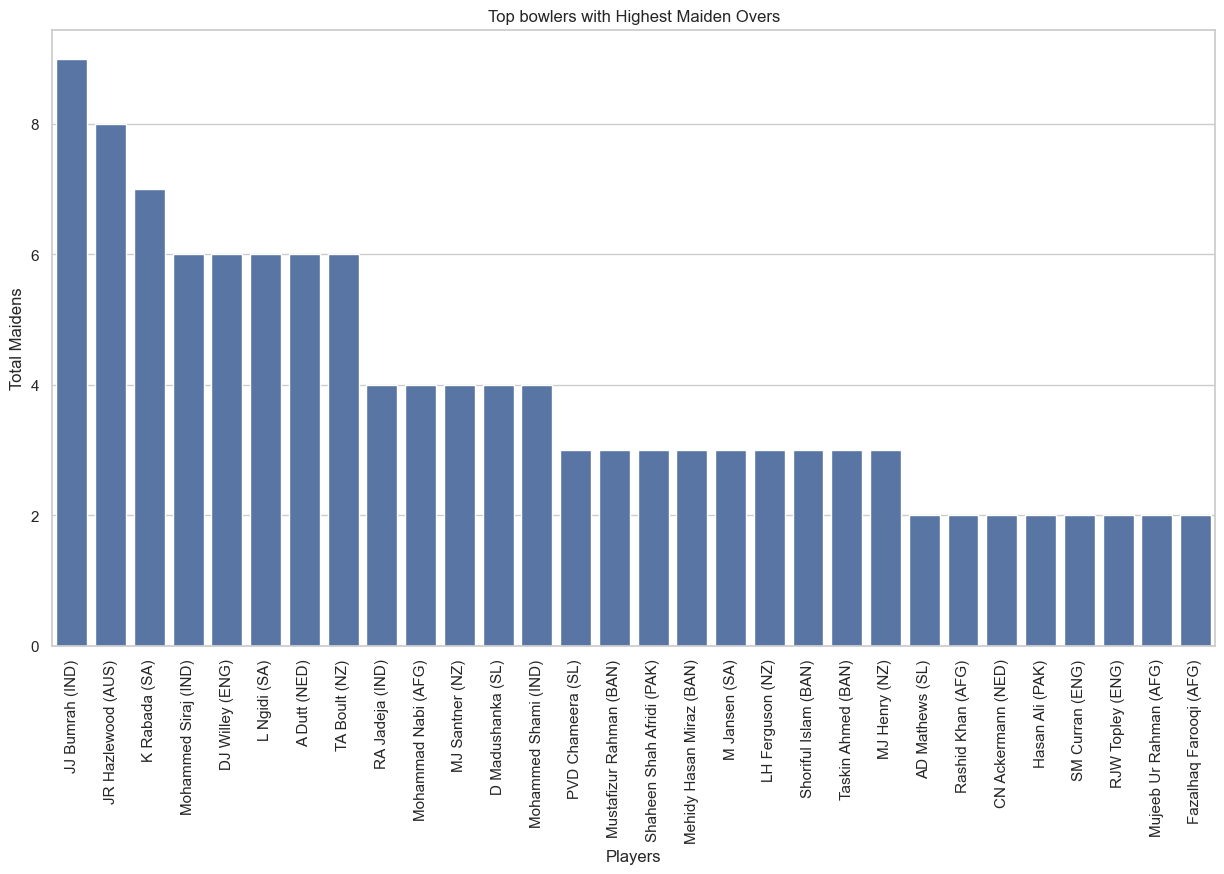

In [49]:
plt.figure(figsize=(15,8))
total_wkts=df[df['bat_or_bowl']=='bowl'].groupby('player')['mdns'].sum().sort_values(ascending=False).head(30)
sns.barplot(x=total_wkts.index,y=total_wkts.values)
plt.xlabel("Players")
plt.ylabel("Total Maidens")
plt.title("Top bowlers with Highest Maiden Overs")
plt.xticks(rotation=90)
plt.show()

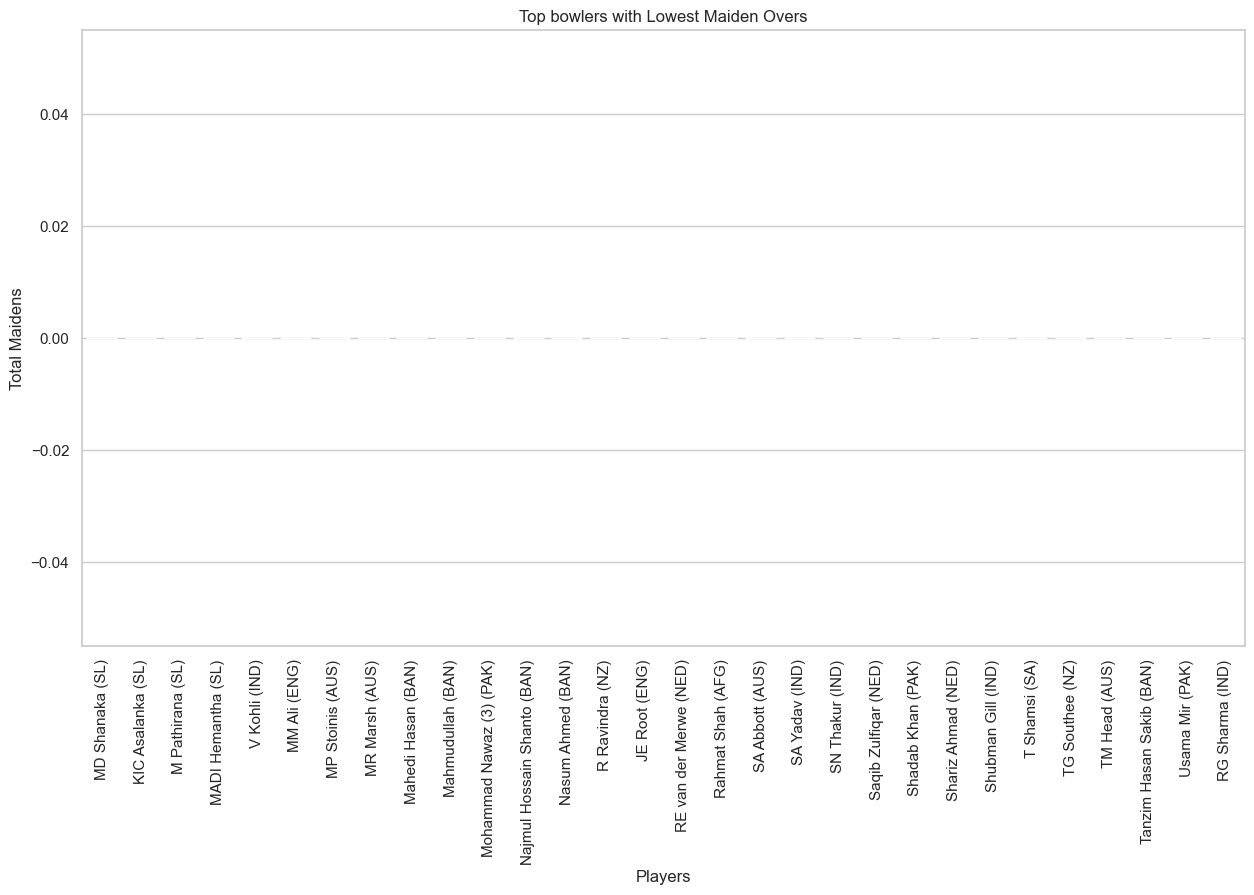

In [50]:
plt.figure(figsize=(15,8))
total_wkts=df[df['bat_or_bowl']=='bowl'].groupby('player')['mdns'].sum().sort_values(ascending=True).head(30)
sns.barplot(x=total_wkts.index,y=total_wkts.values)
plt.xlabel("Players")
plt.ylabel("Total Maidens")
plt.title("Top bowlers with Lowest Maiden Overs")
plt.xticks(rotation=90)
plt.show()

In [51]:
df[df['bat_or_bowl']=='bowl'].groupby('player')['mdns'].sum().sort_values(ascending=True).head(50)

player
MD Shanaka (SL)                0.0
KIC Asalanka (SL)              0.0
M Pathirana (SL)               0.0
MADI Hemantha (SL)             0.0
V Kohli (IND)                  0.0
MM Ali (ENG)                   0.0
MP Stoinis (AUS)               0.0
MR Marsh (AUS)                 0.0
Mahedi Hasan (BAN)             0.0
Mahmudullah (BAN)              0.0
Mohammad Nawaz (3) (PAK)       0.0
Najmul Hossain Shanto (BAN)    0.0
Nasum Ahmed (BAN)              0.0
R Ravindra (NZ)                0.0
JE Root (ENG)                  0.0
RE van der Merwe (NED)         0.0
Rahmat Shah (AFG)              0.0
SA Abbott (AUS)                0.0
SA Yadav (IND)                 0.0
SN Thakur (IND)                0.0
Saqib Zulfiqar (NED)           0.0
Shadab Khan (PAK)              0.0
Shariz Ahmad (NED)             0.0
Shubman Gill (IND)             0.0
T Shamsi (SA)                  0.0
TG Southee (NZ)                0.0
TM Head (AUS)                  0.0
Tanzim Hasan Sakib (BAN)       0.0
Usama Mir (PA

# Country Wise Analysis

In [52]:
df

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05000,0.750000,South Africa,Chennai,2023-10-27,10.0,0.0,4.50,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05000,0.750000,India,Lucknow,2023-10-29,10.0,2.0,4.50,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05000,0.800000,England,Ahmedabad,2023-10-05,10.0,1.0,4.80,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05000,0.816667,Bangladesh,Chennai,2023-10-13,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05000,0.816667,Pakistan,Chennai,2023-10-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,IND,Mohammed Shami (IND),bowl,42,47,1.0,0.02381,1.119048,Australia,Ahmedabad,2023-11-19,7.0,1.0,6.71,2,NaN,NaN,NaN,NaN,NaN
1433,AUS,TM Head (AUS),bowl,12,4,0.0,0.00000,0.333333,India,Ahmedabad,2023-11-19,2.0,0.0,2.00,1,NaN,NaN,NaN,NaN,NaN
1434,AUS,MR Marsh (AUS),bowl,12,5,0.0,0.00000,0.416667,India,Ahmedabad,2023-11-19,2.0,0.0,2.50,1,NaN,NaN,NaN,NaN,NaN
1435,IND,RA Jadeja (IND),bowl,60,43,0.0,0.00000,0.716667,Australia,Ahmedabad,2023-11-19,10.0,0.0,4.30,2,NaN,NaN,NaN,NaN,NaN


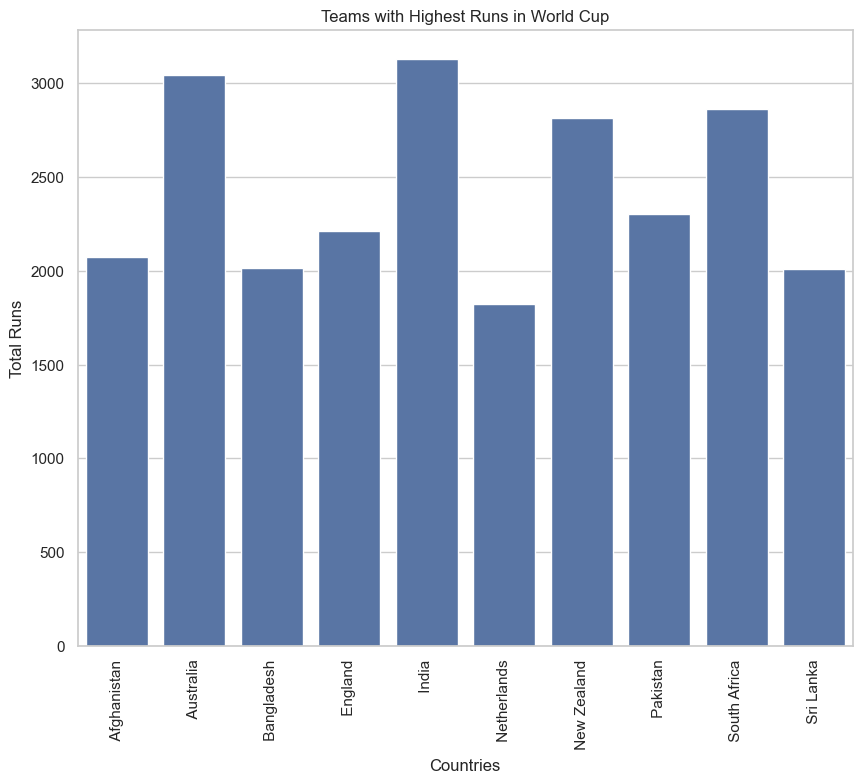

In [53]:
plt.figure(figsize=(10,8))
total_team_runs=df[df['bat_or_bowl']=='bowl'].groupby('opposition')['runs'].sum()
sns.barplot(x=total_team_runs.index,y=total_team_runs.values)
plt.xlabel("Countries")
plt.ylabel("Total Runs")
plt.title("Teams with Highest Runs in World Cup")
plt.xticks(rotation=90)
plt.show()

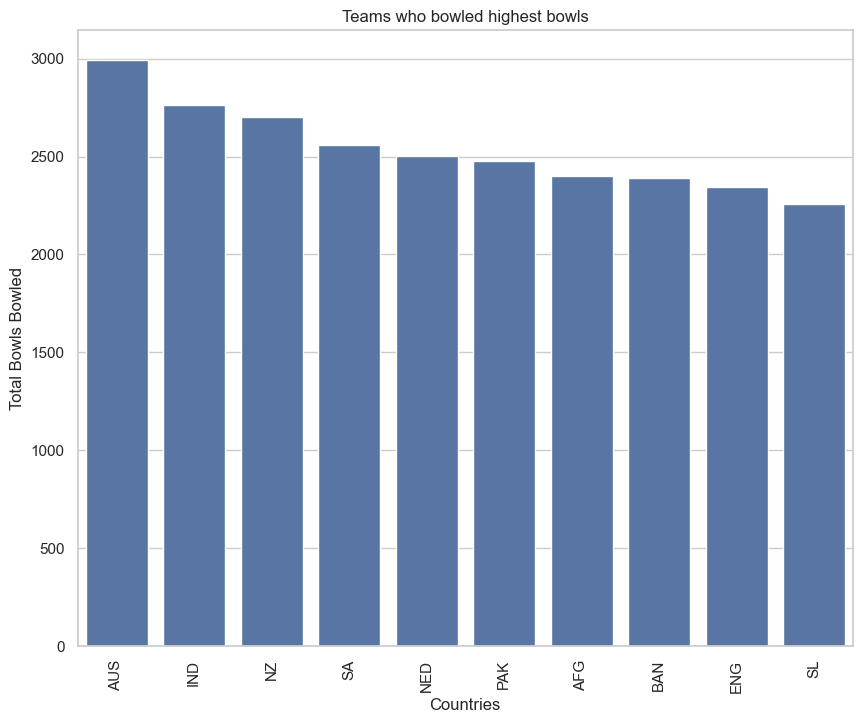

In [54]:
plt.figure(figsize=(10,8))
total_team_runs=df[df['bat_or_bowl']=='bowl'].groupby('team')['bb_bf'].sum().sort_values(ascending=False)
sns.barplot(x=total_team_runs.index,y=total_team_runs.values)
plt.xlabel("Countries")
plt.ylabel("Total Bowls Bowled")
plt.title("Teams who bowled highest bowls")
plt.xticks(rotation=90)
plt.show()

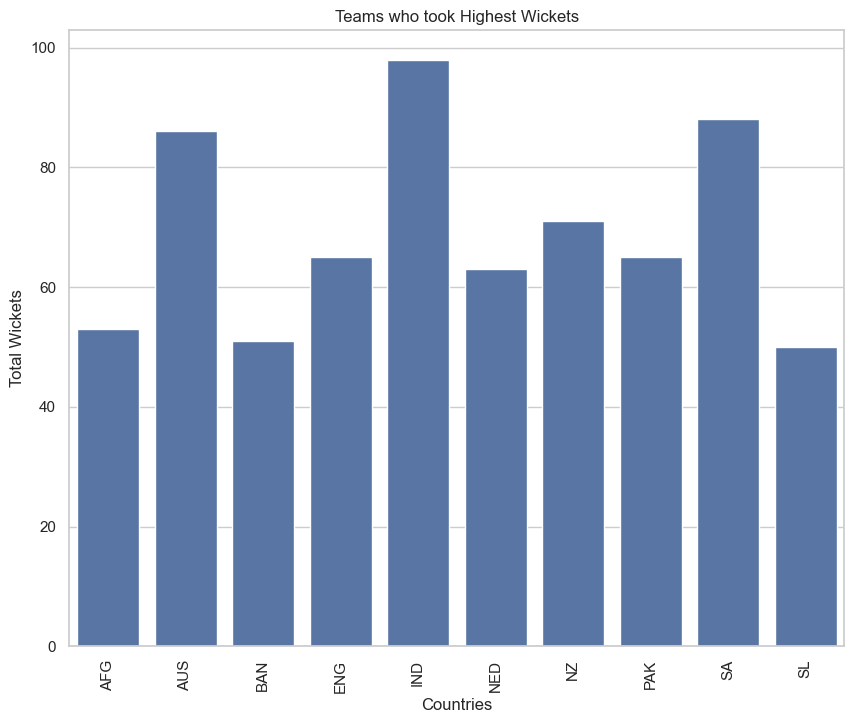

In [55]:
plt.figure(figsize=(10,8))
total_team_runs=df[df['bat_or_bowl']=='bowl'].groupby('team')['wkts'].sum()
sns.barplot(x=total_team_runs.index,y=total_team_runs.values)
plt.xlabel("Countries")
plt.ylabel("Total Wickets")
plt.title("Teams who took Highest Wickets")
plt.xticks(rotation=90)
plt.show()

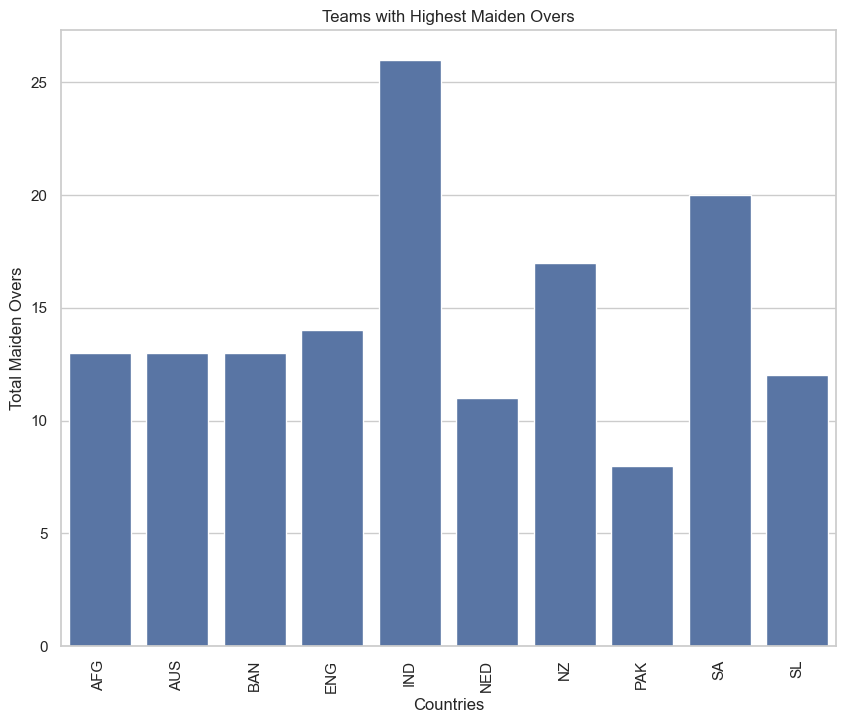

In [56]:
plt.figure(figsize=(10,8))
total_team_runs=df[df['bat_or_bowl']=='bowl'].groupby('team')['mdns'].sum()
sns.barplot(x=total_team_runs.index,y=total_team_runs.values)
plt.xlabel("Countries")
plt.ylabel("Total Maiden Overs")
plt.title("Teams with Highest Maiden Overs")
plt.xticks(rotation=90)
plt.show()

In [57]:
countries_strongness_ground=df[df['bat_or_bowl']=='bowl'].groupby(['opposition','ground'])['runs'].sum().sort_values(ascending=False)

In [58]:
countries_strongness_ground_reset=countries_strongness_ground.reset_index()

In [59]:
max_runs_index=countries_strongness_ground_reset.groupby('ground')['runs'].idxmax()

In [60]:
max_runs_index

ground
Ahmedabad       10
Bengaluru        5
Chennai          8
Delhi            4
Dharamsala       2
Eden Gardens    14
Hyderabad        3
Lucknow         13
Pune             6
Wankhede         0
Name: runs, dtype: int64

In [61]:
max_runs_teams = countries_strongness_ground_reset.loc[max_runs_index]

In [62]:
max_runs_teams=max_runs_teams.sort_values(by='runs',ascending=False)

In [63]:
max_runs_teams

,opposition,ground,runs
0,South Africa,Wankhede,773
2,New Zealand,Dharamsala,644
3,Pakistan,Hyderabad,631
4,Sri Lanka,Delhi,597
5,New Zealand,Bengaluru,565
6,Bangladesh,Pune,551
8,Pakistan,Chennai,544
10,England,Ahmedabad,529
13,Sri Lanka,Lucknow,455
14,Pakistan,Eden Gardens,446


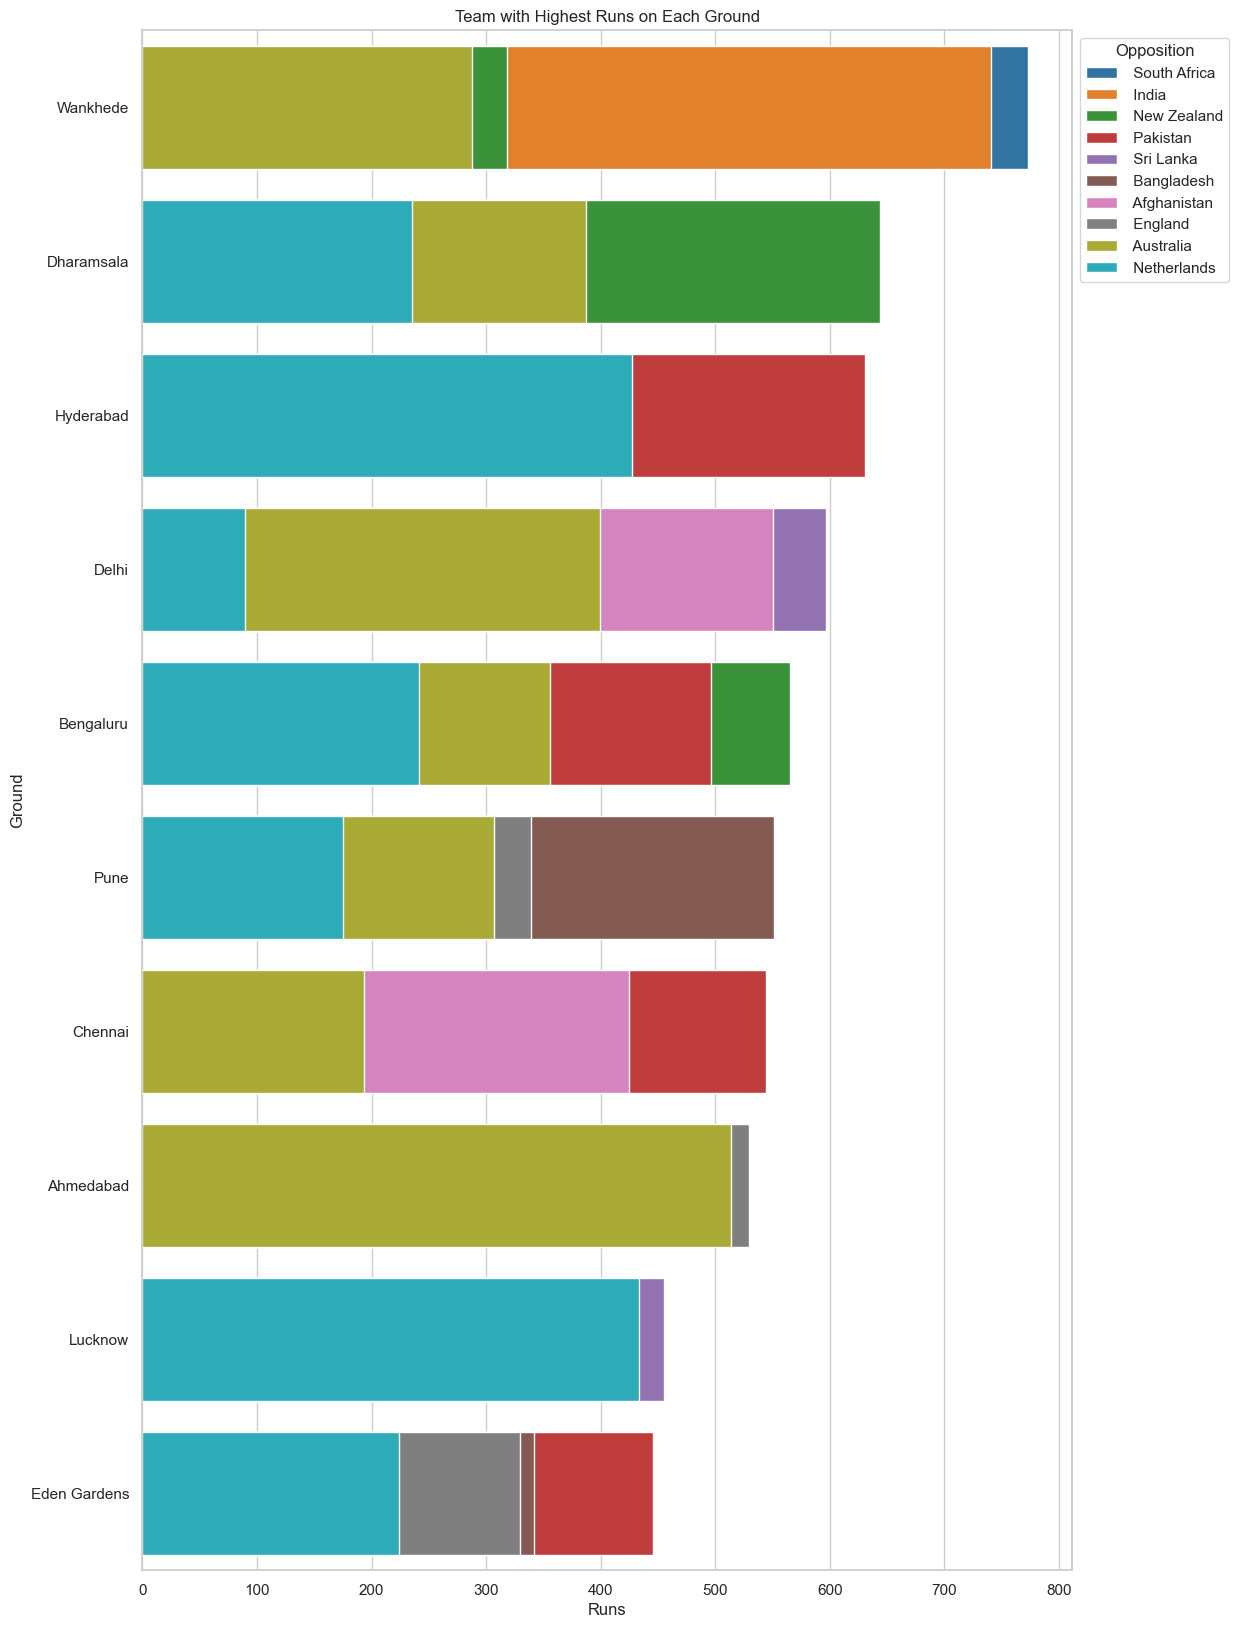

In [64]:
custom_colors = sns.color_palette("tab10", 10)
plt.figure(figsize=(12, 20))
sns.barplot(x='runs', y='ground', hue='opposition', data=countries_strongness_ground_reset,dodge=False,palette=custom_colors)
plt.xlabel('Runs')
plt.ylabel('Ground')
plt.title('Team with Highest Runs on Each Ground')
plt.legend(title='Opposition', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

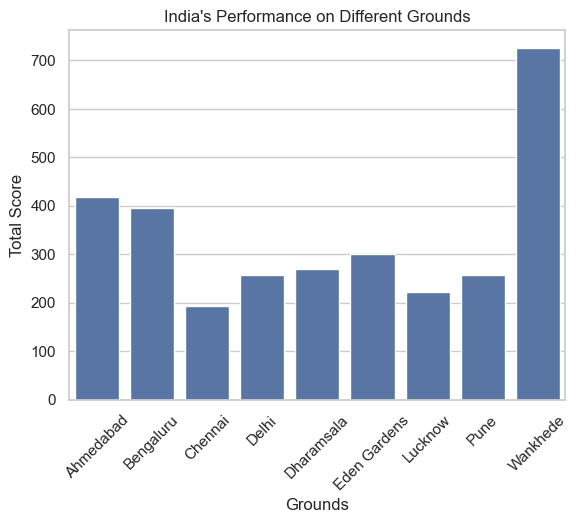

ground
Ahmedabad       418
Bengaluru       395
Chennai         193
Delhi           258
Dharamsala      269
Eden Gardens    300
Lucknow         222
Pune            257
Wankhede        726
Name: runs, dtype: int64


In [65]:
india_ground_score=df[(df['bat_or_bowl']=='bat') & (df['team']=='IND')].groupby('ground')['runs'].sum()
sns.barplot(x=india_ground_score.index,y=india_ground_score.values)
plt.xlabel("Grounds")
plt.ylabel("Total Score")
plt.xticks(rotation=45)
plt.title("India's Performance on Different Grounds")
plt.show()
print(india_ground_score)

In [66]:
df

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05000,0.750000,South Africa,Chennai,2023-10-27,10.0,0.0,4.50,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05000,0.750000,India,Lucknow,2023-10-29,10.0,2.0,4.50,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05000,0.800000,England,Ahmedabad,2023-10-05,10.0,1.0,4.80,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05000,0.816667,Bangladesh,Chennai,2023-10-13,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05000,0.816667,Pakistan,Chennai,2023-10-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,IND,Mohammed Shami (IND),bowl,42,47,1.0,0.02381,1.119048,Australia,Ahmedabad,2023-11-19,7.0,1.0,6.71,2,NaN,NaN,NaN,NaN,NaN
1433,AUS,TM Head (AUS),bowl,12,4,0.0,0.00000,0.333333,India,Ahmedabad,2023-11-19,2.0,0.0,2.00,1,NaN,NaN,NaN,NaN,NaN
1434,AUS,MR Marsh (AUS),bowl,12,5,0.0,0.00000,0.416667,India,Ahmedabad,2023-11-19,2.0,0.0,2.50,1,NaN,NaN,NaN,NaN,NaN
1435,IND,RA Jadeja (IND),bowl,60,43,0.0,0.00000,0.716667,Australia,Ahmedabad,2023-11-19,10.0,0.0,4.30,2,NaN,NaN,NaN,NaN,NaN


In [67]:
# Iterate over unique matches
for date, country in df[['start_date', 'team']].drop_duplicates().itertuples(index=False):
    country_runs = df[(df['bat_or_bowl'] == 'bat') & (df['start_date'] == date) & (df['team'] == country)]
    country_score = country_runs['runs'].sum()

    # Assuming there is a column named 'opponent' for the second country
    opponent = df.loc[(df['start_date'] == date) & (df['team'] != country), 'team'].iloc[0]
    second_country_runs = df[(df['bat_or_bowl'] == 'bat') & (df['start_date'] == date) & (df['team'] == opponent)]
    second_country_score = second_country_runs['runs'].sum()

    # Check if the match has already been processed to avoid duplicates
    if country < opponent:
        if country_score > second_country_score:
            print(f"{country} defeated {opponent} by making {country_score} runs on {date}")
        else:
            print(f"{opponent} defeated {country} by making {second_country_score} runs on {date}")


PAK defeated SA by making 251 runs on 2023-10-27 00:00:00
IND defeated ENG by making 222 runs on 2023-10-29 00:00:00
AFG defeated PAK by making 277 runs on 2023-10-23 00:00:00
AFG defeated ENG by making 269 runs on 2023-10-15 00:00:00
ENG defeated NED by making 318 runs on 2023-11-08 00:00:00
NED defeated SA by making 213 runs on 2023-10-17 00:00:00
PAK defeated BAN by making 201 runs on 2023-10-31 00:00:00
AUS defeated NZ by making 379 runs on 2023-10-28 00:00:00
ENG defeated BAN by making 357 runs on 2023-10-10 00:00:00
SL defeated BAN by making 272 runs on 2023-11-06 00:00:00
SA defeated ENG by making 384 runs on 2023-10-21 00:00:00
IND defeated SA by making 300 runs on 2023-11-05 00:00:00
IND defeated PAK by making 190 runs on 2023-10-14 00:00:00
AUS defeated NED by making 387 runs on 2023-10-25 00:00:00
NZ defeated SL by making 170 runs on 2023-11-09 00:00:00
SL defeated ENG by making 157 runs on 2023-10-26 00:00:00
AFG defeated NED by making 169 runs on 2023-11-03 00:00:00
AUS de

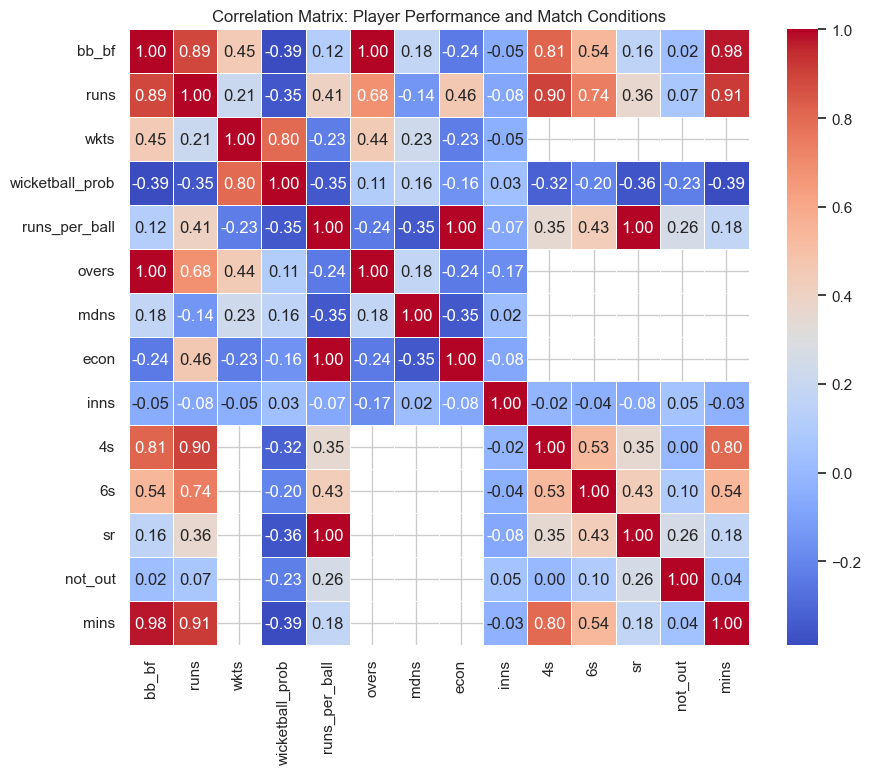

In [68]:
df1=df.select_dtypes(include=[int,float])
columns_of_interest =df1.columns
selected_data = df1[columns_of_interest]

# Convert date to datetime format
#selected_data['start_date'] = pd.to_datetime(selected_data['start_date'])

# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Player Performance and Match Conditions')
plt.show()

## The End